In [1]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].
from __future__ import division
import numpy as np
import math

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        
        return np.random.uniform(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")


In [2]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
x0 = 0
#yk = 1/(k+1)  step length 


In [3]:
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.        
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task1(y1)
print(Listobj1)
xk2 ,Listobj2 = IGD_wr_task1(y2)


def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    Listx = []
    Listobj = []
    x0 = 0
    xk = x0
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        Listx.append(xk)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)       
    return xk, Listobj #Listx

xk1_no ,Listobj1_no = IGD_wo_task1(y1)
#print(Listobj1_no)
xk2_no ,Listobj2_no = IGD_wo_task1(y2)


[96.39774907074835, 94.97314668322426, 104.8100208285133, 116.29883718265633, 110.60493946693722, 97.91959142611677, 83.94930999226384, 75.54888035668947, 72.74327055851379, 73.12073211518299, 82.65050004079009, 87.93205035771199, 77.96041465862136, 74.07031597313211, 73.54044874297021, 70.17971130175377, 67.99440854069493, 68.7873273030445, 71.73891181798021, 76.48349885531617, 75.3745822416951, 74.49014528117226, 74.06959786518053, 71.05669380857205, 70.24687093282702, 70.39527287903162, 69.75141155462373, 68.03686645841718, 68.37764805959178, 67.0975381112545, 65.85968280881112, 65.29436941027225, 64.89267914537655, 65.07914602236706, 64.47715812095383, 64.0998265321035, 64.155268599865, 63.67937724543019, 62.68815574821606, 62.21102296518813, 62.48253054179742, 62.54611054688821, 62.265160896835795, 63.92917658417712, 63.80923982271296, 63.4623817376666, 63.026423733407334, 63.7698799690617, 64.27080284704623, 64.89256045281446, 64.81716007288992, 65.46361370731474, 64.403433279347

In [4]:
import matplotlib.pyplot as plt

plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()


<Figure size 640x480 with 1 Axes>

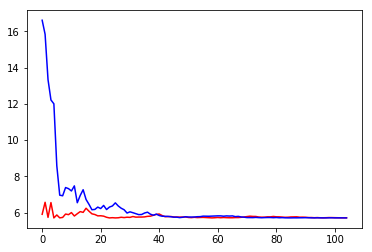

In [5]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()


In [6]:
def IGD_wr_task2(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95/np.min(beta_lst)
    for i in range(n):
        target = y[ordering[i]]
        beta = beta_lst[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - target)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task2(y1)

xk2 ,Listobj2 = IGD_wr_task2(y2)


def IGD_wo_task2(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95/np.min(beta_lst)
    for i in range(n):
        target = y[ordering[i]]
        beta = beta_lst[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - target)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1_no ,Listobj1_no = IGD_wo_task2(y1)

xk2_no ,Listobj2_no = IGD_wo_task2(y2)



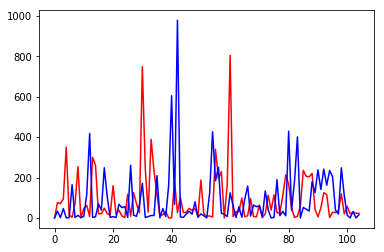

In [7]:
plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()

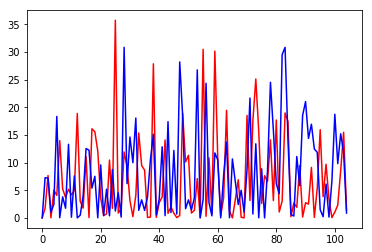

In [8]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()

In [17]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y
A1, xstar1, y1 = generate_problem_task3(200, 100, 0.01)
A2, xstar2, y2 = generate_problem_task3(200, 100, 0.01)

In [11]:
t = np.zeros(100)
print(t.shape)
print(A.shape[1])
n = 200
objk = 0
for j in range(n):
    a = A1[j,:]
    objk += (np.dot(a,xstar1) - )**2

(100,)
100


In [46]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
round_num = 10
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = len(y)
    x0 = np.zeros(A.shape[1])
    xk = x0
    Listobj = []
    step_size = 10**(-3)
    for each in range(round_num):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            target = y[ordering[i]]
            ak = A[ordering[i],:]
            xk = xk - step_size*ak*(np.dot(ak,xk) - target)
            objk = 0
            for j in range(n):
                a = A[j,:]
                objk += (np.dot(a,xk) - y[j])**2
            Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task3(y1,A1)
xk2 ,Listobj2 = IGD_wr_task3(y2,A2)

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    x0 = np.zeros(A.shape[1])
    xk = x0
    Listobj = []
    step_size = 10**(-3)
    for each in range(round_num):
        for i in range(n):
            target = y[ordering[i]]
            ak = A[ordering[i],:]
            xk = xk - step_size*ak*(ak@xk - target)
            objk = 0
            for j in range(n):
                a = A[j,:]
                objk += (a@xk - y[j])**2
            Listobj.append(objk)  
    return xk, Listobj

xk1_no ,Listobj1_no = IGD_wo_task3(y1,A1)

xk2_no ,Listobj2_no = IGD_wo_task3(y2,A2)

In [28]:
#print(xk1,xstar1)

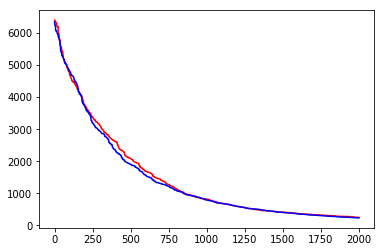

In [47]:
plt.plot(np.arange(len(Listobj1)), Listobj1, 'r')
plt.plot(np.arange(len(Listobj1_no)), Listobj1_no, 'b')
plt.show()

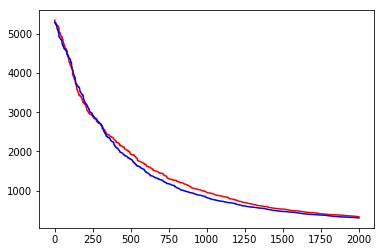

In [48]:
plt.plot(np.arange(len(Listobj2)), Listobj2, 'r')
plt.plot(np.arange(len(Listobj2_no)), Listobj2_no, 'b')
plt.show()